In [ ]:
!pip install bitsandbytes
!pip install accelerate
!pip install -i https://pypi.org/simple/ bitsandbytes

In [ ]:
from transformers import pipeline, BitsAndBytesConfig
import torch

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

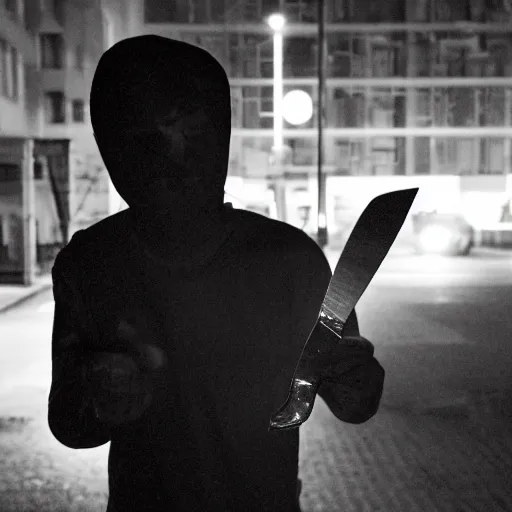

In [11]:
import requests
from PIL import Image

image_url = "https://cdn.openart.ai/stable_diffusion/85c605bd2e9bed92f36c8ec996b76005e8b702b1_2000x2000.webp"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [13]:
prompt = "USER: <image>\nDescribe this picture​​\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs[0]['generated_text'])

USER:  
Describe this picture​​
ASSISTANT: The image features a person standing in a dark street at night, holding a knife. The person is wearing a mask, which adds a mysterious element to the scene. The knife is held in a way that it is visible and prominent in the foreground.

In the background, there is a car parked on the side of the street. The overall atmosphere of the scene is eerie and mysterious, with the person's mask and the knife creating a sense of danger.


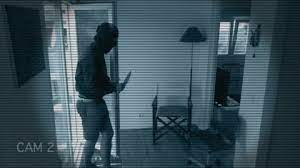

In [6]:
import requests
from PIL import Image

image = Image.open("/content/download.jpeg")
image

In [10]:
prompt = '''USER: <image>\nYou are helpful CCTV assistant who desrcibes or gives contenxtual awareness about potentional happening of a crime
            and thus describe the image in that sense.​​\nASSISTANT:'''

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
print(outputs[0]['generated_text'])

USER:  
You are helpful CCTV assistant who desrcibes or gives contenxtual awareness about potentional happening of a crime and thus describe the image in that sense.​​
ASSISTANT: The image depicts a man standing in a room, holding a knife in his hand. He appears to be wearing a mask, which adds to the mysterious and potentially dangerous atmosphere of the scene. The room is furnished with a chair and a TV, which suggests that it could be a living room or a similar space. The man's actions and attire raise concerns about his intentions and the potential for a crime to occur.
